In [70]:
#Importaciones

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
#Leer los datos y guardarlos en un dataframe
data = pd.read_csv('datos.csv', index_col=0)

In [72]:
#Ver el tamaño de los datos

print(data.shape)
data.head()


(414, 7)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [73]:
#Estadisticas descriptivas de las variables

data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


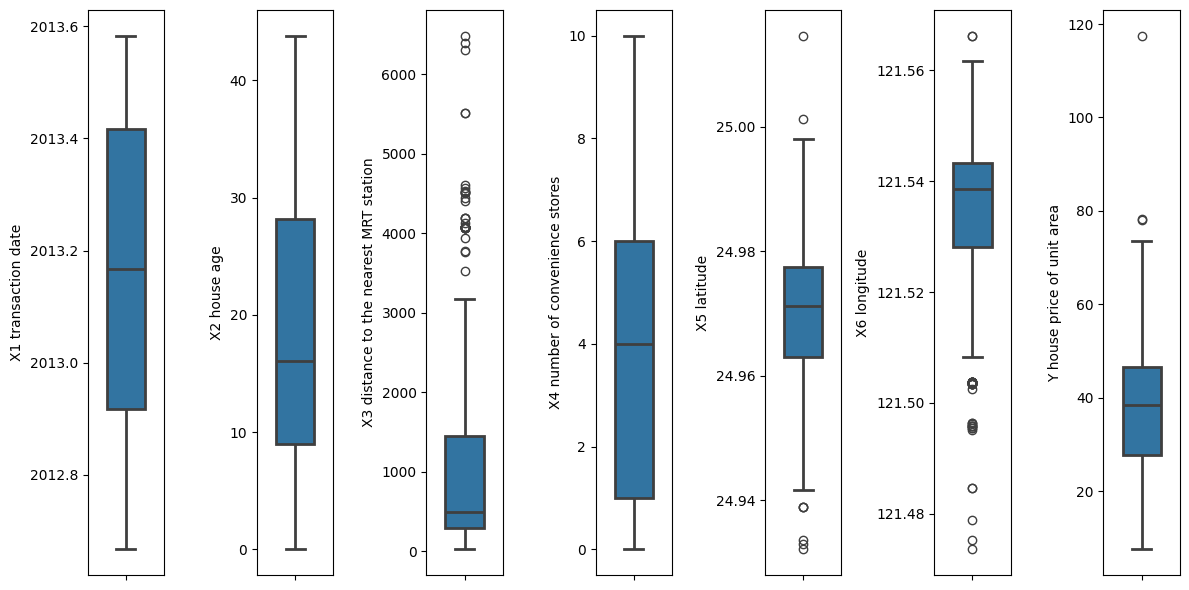

In [74]:
# Crear una visualizacion para las graficas
plt.figure(figsize=(12, 6))

# Sacar el numero de variables
num_variables = data.shape[1]

# Crear un boxplot para cada variable
for i in range(num_variables):
    plt.subplot(1, num_variables, i+1)
    sns.boxplot(y=data.iloc[:, i], width=0.5, linewidth=2)
    plt.ylabel(data.columns[i]) 

# Evitar que las graficas se sobrelapen
plt.tight_layout()

# Mostrar el plot
plt.show()

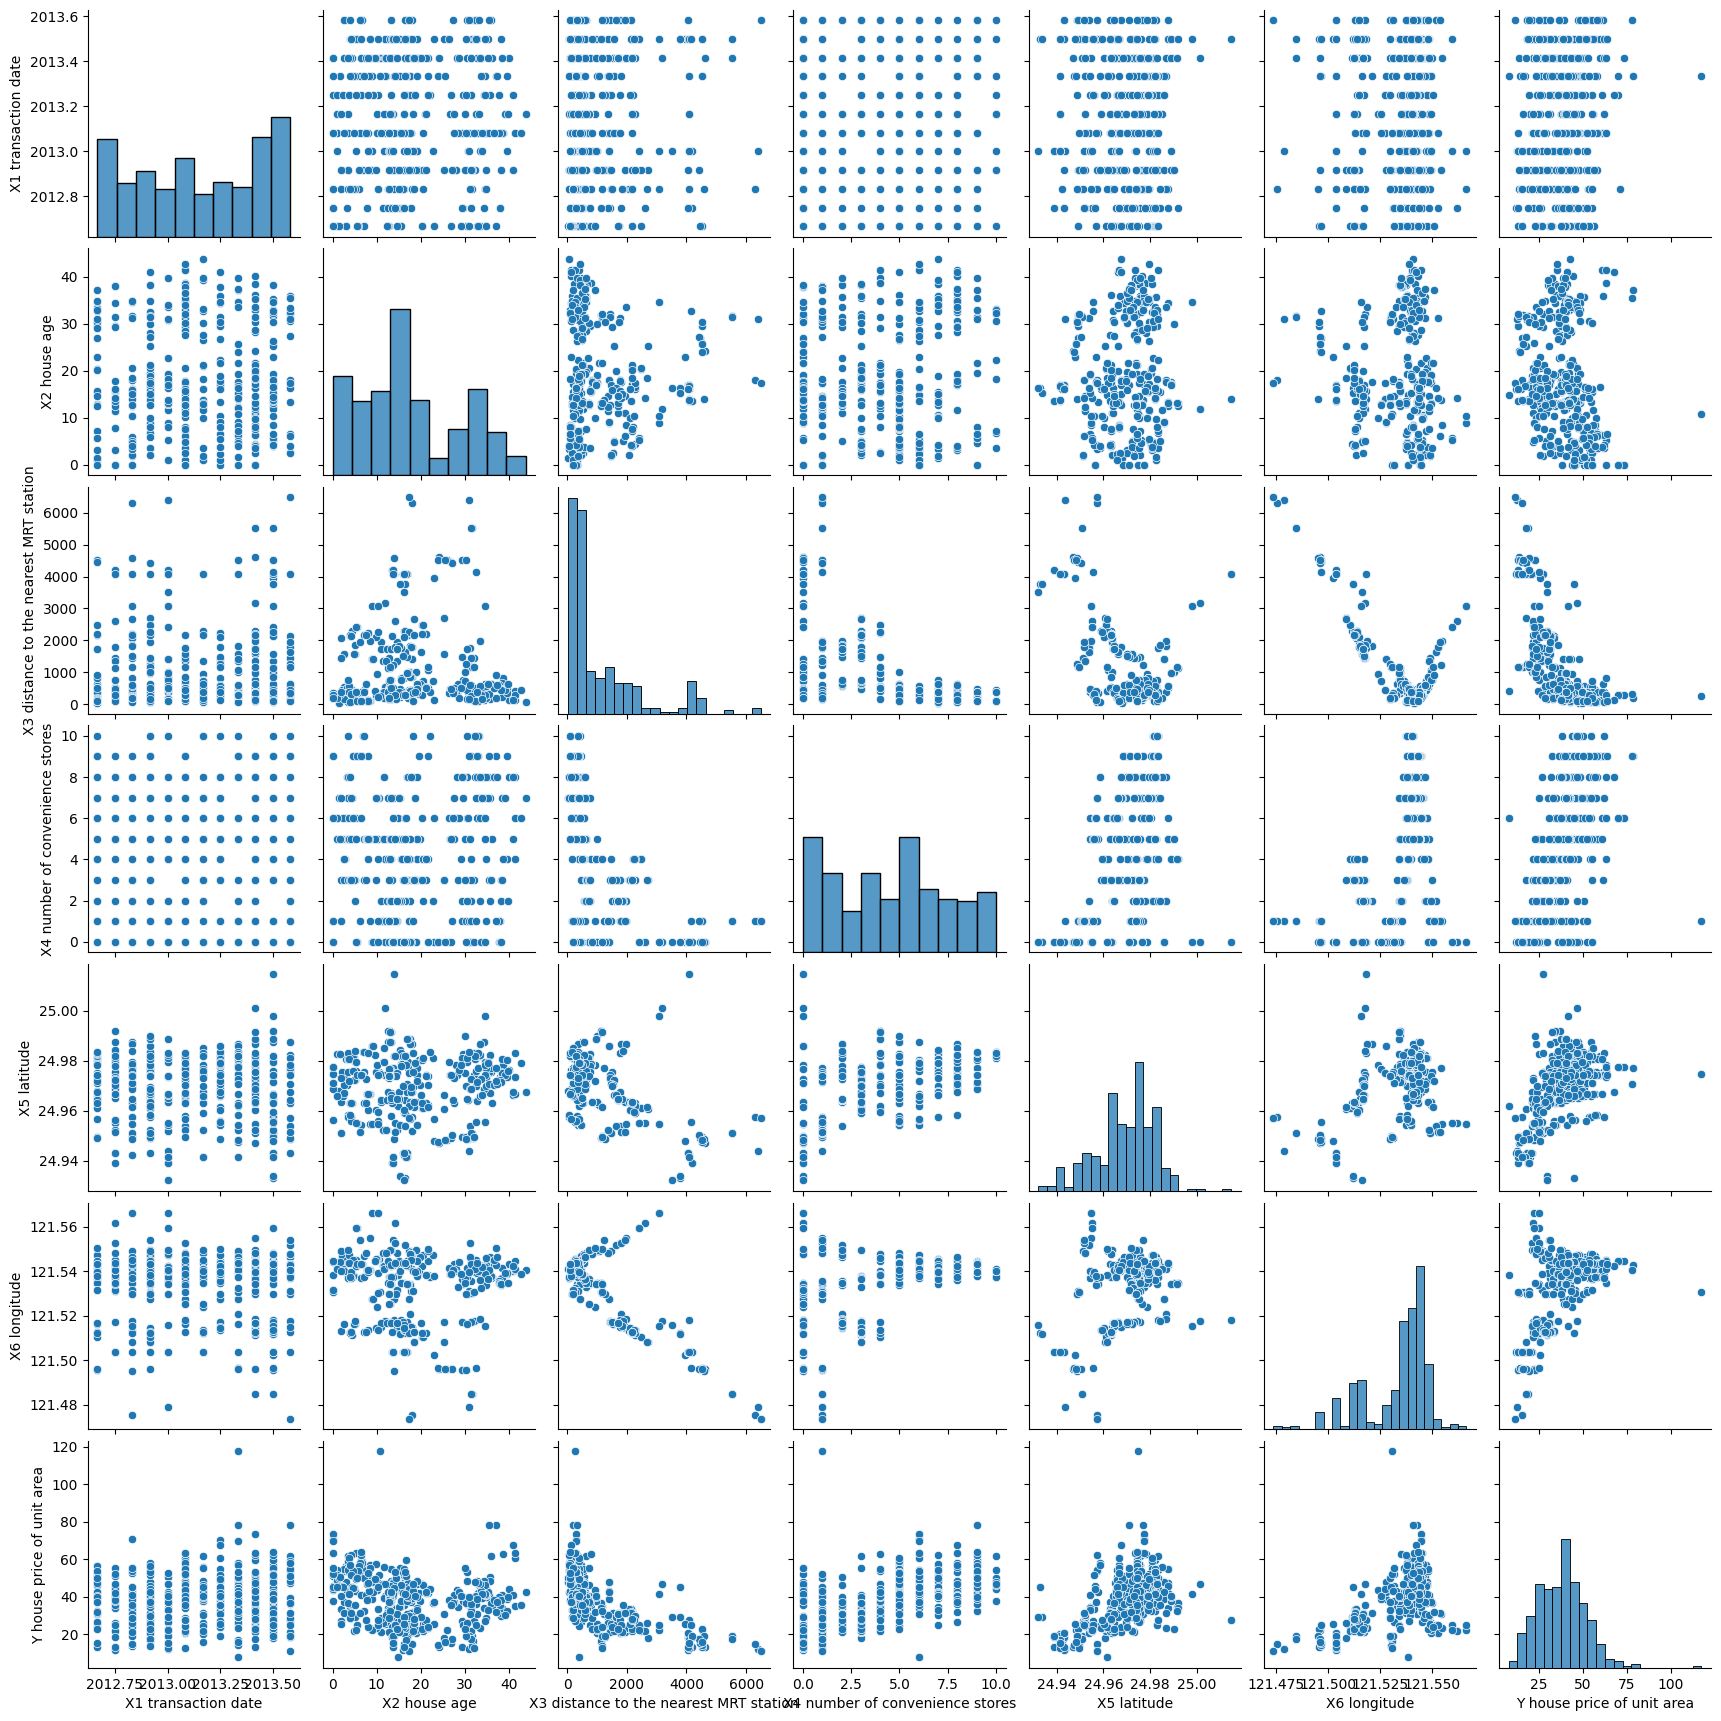

In [75]:
#Visualizacion de la relacion de las variables 

sns.pairplot(data,)

<Axes: >

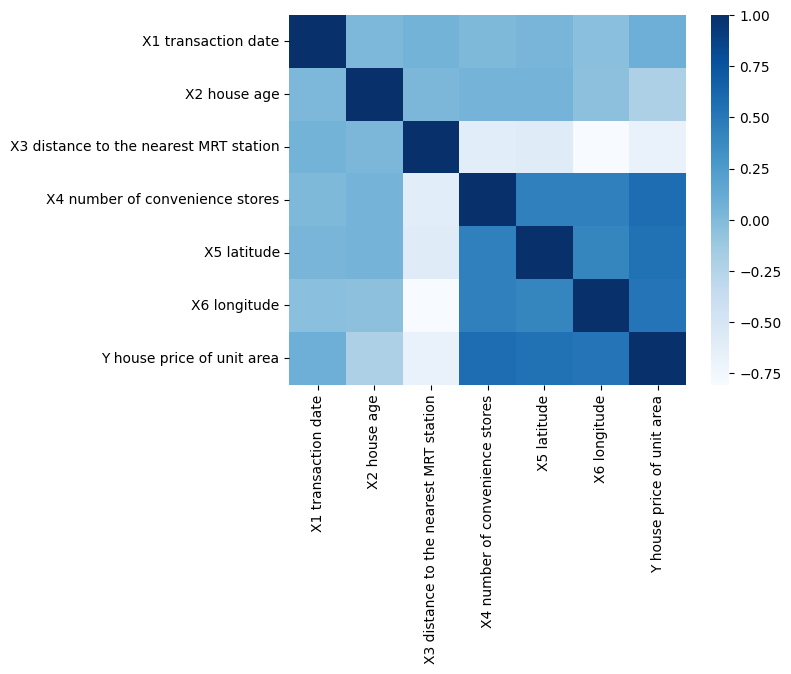

In [76]:
#Correlograma para la relacion entre las variables

corr = data.corr()
sns.heatmap(corr, cmap="Blues")

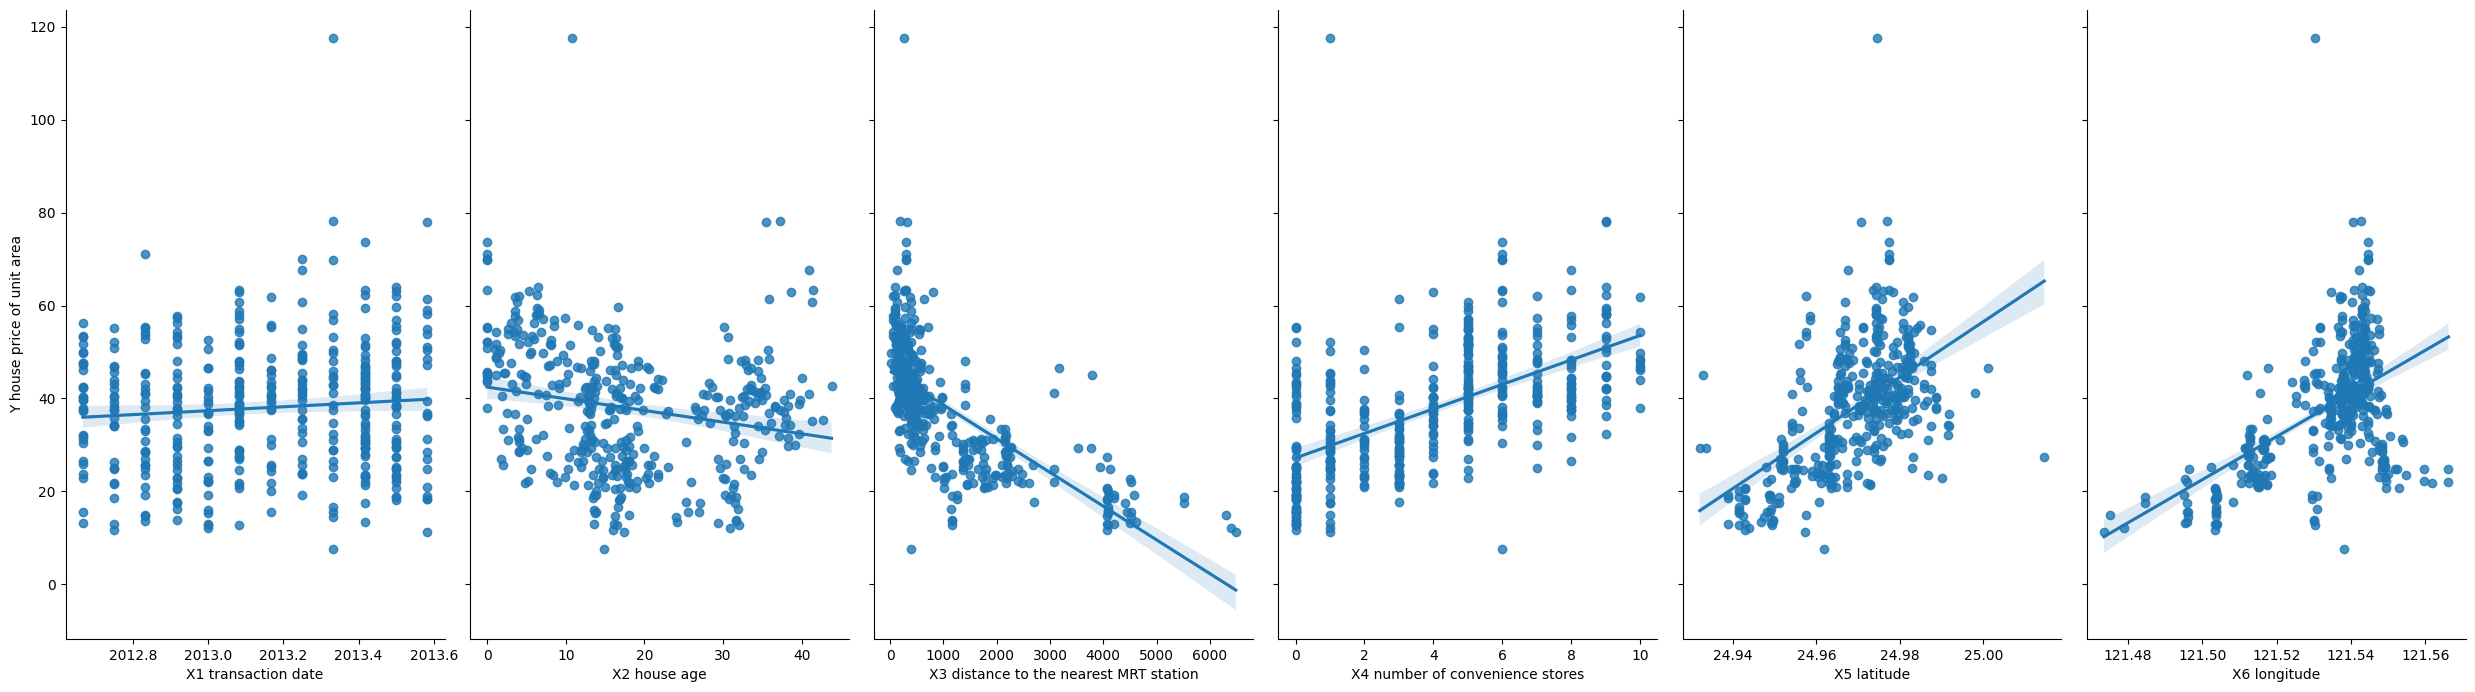

In [77]:
#Diagrama de dispersion con tendencia

sns.pairplot(data, x_vars= data.columns[:-1], y_vars='Y house price of unit area', height=7, aspect=0.6, kind='reg')

### Modelo lineal

In [78]:
#Importaciones para crear el modelo lineal.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
# Eleccion de variables de interes
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
# dataframe de características
X = data[features]

X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
No,,,
1,32.0,84.87882,10
2,19.5,306.59470,9
3,13.3,561.98450,5
4,13.3,561.98450,5
5,5.0,390.56840,5


In [80]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [81]:
#Separacion entre datos de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 3)
(331,)
(83, 3)
(83,)


In [82]:
# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

# imprimir coeficientes
print(linreg.intercept_)
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

43.0269376337089


[('X2 house age', -0.22831885553619688),
 ('X3 distance to the nearest MRT station', -0.0053706214004605665),
 ('X4 number of convenience stores', 1.286069807548099)]

### Utilizar el modelo para la prediccion

In [83]:
y_pred = linreg.predict(X_test)

y_pred

array([33.70239435, 49.45253668, 24.46318192, 17.53373678, 42.84137984,
       33.0203966 , 31.02399119, 38.92433597, 38.38747312, 13.17151555,
       14.42627631, 41.68213859, 32.40605306, 46.76129128, 52.7686794 ,
       33.1757911 , 42.84137984, 42.61195567, 31.27225116, 44.27316291,
       51.26424902, 30.20432015, 42.33376259, 48.29855043, 45.41276319,
       32.60471417, 33.58282052, 46.95368103, 46.21809739, 17.29105563,
       35.27163415, 34.52306632, 39.19097185, 47.04500858, 48.37058182,
       17.37942883, 40.79129413, 38.75064645, 33.41953891, 17.46524112,
       40.8039878 , 29.58706708, 52.6088562 , 34.43912813, 33.38737029,
       37.41197628, 32.35508527, 40.57815211, 42.9137486 , 33.19448199,
       17.40226072, 43.49533372, 46.67678409, 17.9760122 , 52.78109764,
       46.0229027 , 42.84137984, 38.55692421, 39.15768216, 43.86838548,
       29.50812294, 40.49966006, 33.58569379, 17.37942883, 38.75963928,
       43.74691456, 41.71976928, 47.47978674, 17.99884408, 37.97

### Evaluacion del modelo

In [84]:
#Importacion de metricas de evaluacion
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [85]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.475527486473668
MSE:  48.353564489825516
RMSE:  6.9536727338742015


In [86]:
#Evaluacion del modelo con validacion cruzada
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 60.87595717  90.87917772  64.41551856 147.23299496  62.75282893]


In [87]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.80230461  9.5330571   8.02592789 12.1339604   7.92166832]


In [88]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

9.08338366392503
